**1. Dataset Description**

Heart disease is one of the leading causes of mortality worldwide, making its early detection and prevention critical. Various factors, such as lifestyle habits, age, gender, and genetics, play a significant role in determining heart health. By analyzing these factors, we can gain insights into the likelihood of heart disease and support timely medical interventions. This dataset contains key indicators related to heart health, providing an opportunity to explore patterns, build predictive models, and contribute to the understanding of cardiovascular conditions.

**2. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**3. Read Dataset**

In [2]:
df=pd.read_csv(r"D:/Data_Science/Capstone Project-3/archive (4)/heart_disease.csv")
df.head()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

**4. Dataset Overview**

In [3]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [4]:
df.dtypes

Age                     float64
Gender                   object
Blood Pressure          float64
Cholesterol Level       float64
Exercise Habits          object
Smoking                  object
Family Heart Disease     object
Diabetes                 object
BMI                     float64
High Blood Pressure      object
Low HDL Cholesterol      object
High LDL Cholesterol     object
Alcohol Consumption      object
Stress Level             object
Sleep Hours             float64
Sugar Consumption        object
Triglyceride Level      float64
Fasting Blood Sugar     float64
CRP Level               float64
Homocysteine Level      float64
Heart Disease Status     object
dtype: object

In [5]:
df.count()

Age                      9971
Gender                   9981
Blood Pressure           9981
Cholesterol Level        9970
Exercise Habits          9975
Smoking                  9975
Family Heart Disease     9979
Diabetes                 9970
BMI                      9978
High Blood Pressure      9974
Low HDL Cholesterol      9975
High LDL Cholesterol     9974
Alcohol Consumption      7414
Stress Level             9978
Sleep Hours              9975
Sugar Consumption        9970
Triglyceride Level       9974
Fasting Blood Sugar      9978
CRP Level                9974
Homocysteine Level       9980
Heart Disease Status    10000
dtype: int64

In [6]:
df.shape

(10000, 21)

In [7]:
df.isnull().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [9]:
df.describe()

Age  Blood Pressure  Cholesterol Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep Hours  Triglyceride Level  Fasting Blood Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195           87.067226            23.584011     4.340248   
min       4.000605          100.000000            80.000000     0.003647   
25%       5.449866          176.000000            99.000000     3.674126   
50%       7.003252          250.000000           120.000000     7.472164   
75%       8.531577          326.000000           141.000000    11.255592   
max       9.999952          400.000000           160.000000    14.997087   

       Homocysteine Level  
count         9980.000000  
mean            12.456271  
std              4.323426  
min              5.000236  
25%              8.723334  
50%             12.409395  
75%             16.140564  
max             19.999037

**5. Data Wrangling**

In [10]:
#check dupliocates if any
df.duplicated().sum()

0

In [11]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [12]:
df.count()

Age                      9971
Gender                   9981
Blood Pressure           9981
Cholesterol Level        9970
Exercise Habits          9975
Smoking                  9975
Family Heart Disease     9979
Diabetes                 9970
BMI                      9978
High Blood Pressure      9974
Low HDL Cholesterol      9975
High LDL Cholesterol     9974
Alcohol Consumption      7414
Stress Level             9978
Sleep Hours              9975
Sugar Consumption        9970
Triglyceride Level       9974
Fasting Blood Sugar      9978
CRP Level                9974
Homocysteine Level       9980
Heart Disease Status    10000
dtype: int64

In [13]:
df.head()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

In [14]:
# filtering out rows with missing values except for the column "Alcohol Consumption"
core_features = df.columns.difference(['Alcohol Consumption'])
df1 = df.dropna(subset=core_features)

In [15]:
df1['Alcohol Consumption'] = (df1['Alcohol Consumption'].fillna('Unknown'))

C:\Users\User\AppData\Local\Temp\ipykernel_26432\1167990547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Alcohol Consumption'] = (df1['Alcohol Consumption'].fillna('Unknown'))


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9532 entries, 1 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9532 non-null   float64
 1   Gender                9532 non-null   object 
 2   Blood Pressure        9532 non-null   float64
 3   Cholesterol Level     9532 non-null   float64
 4   Exercise Habits       9532 non-null   object 
 5   Smoking               9532 non-null   object 
 6   Family Heart Disease  9532 non-null   object 
 7   Diabetes              9532 non-null   object 
 8   BMI                   9532 non-null   float64
 9   High Blood Pressure   9532 non-null   object 
 10  Low HDL Cholesterol   9532 non-null   object 
 11  High LDL Cholesterol  9532 non-null   object 
 12  Alcohol Consumption   9532 non-null   object 
 13  Stress Level          9532 non-null   object 
 14  Sleep Hours           9532 non-null   float64
 15  Sugar Consumption     9532

In [17]:
df1.nunique()

Age                       63
Gender                     2
Blood Pressure            61
Cholesterol Level        151
Exercise Habits            3
Smoking                    2
Family Heart Disease       2
Diabetes                   2
BMI                     9532
High Blood Pressure        2
Low HDL Cholesterol        2
High LDL Cholesterol       2
Alcohol Consumption        4
Stress Level               3
Sleep Hours             9532
Sugar Consumption          3
Triglyceride Level       301
Fasting Blood Sugar       81
CRP Level               9532
Homocysteine Level      9532
Heart Disease Status       2
dtype: int64

In [18]:
df1.isnull().sum()

Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Exercise Habits         0
Smoking                 0
Family Heart Disease    0
Diabetes                0
BMI                     0
High Blood Pressure     0
Low HDL Cholesterol     0
High LDL Cholesterol    0
Alcohol Consumption     0
Stress Level            0
Sleep Hours             0
Sugar Consumption       0
Triglyceride Level      0
Fasting Blood Sugar     0
CRP Level               0
Homocysteine Level      0
Heart Disease Status    0
dtype: int64

In [19]:
##Profile Report
from ydata_profiling import ProfileReport
profile_report = ProfileReport(df1)
profile_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 21/21 [00:00<00:00, 39.84it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
df1.head()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   
5  25.0    Male           152.0              257.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   
5                   No       No  28.144681                  No  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   
5                   No                 Low       Medium    5.504876   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   
5                Low              126.0                 91.0   4.297575   

   Homocysteine Level  Heart Disease Status  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  
5           10.815983                    No  

[5 rows x 21 columns]

In [21]:
df1.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [22]:
#numerical variables
num_cols=['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 'Triglyceride Level', 
          'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

In [23]:
#Categorical variables
categorical = ['Gender','Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes',
              'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sugar Consumption', 'Heart Disease Status']

In [24]:
df1[categorical]

Gender Exercise Habits Smoking Family Heart Disease Diabetes  \
1     Female            High      No                  Yes      Yes   
2       Male             Low      No                   No       No   
3     Female            High     Yes                  Yes       No   
4       Male             Low     Yes                  Yes      Yes   
5       Male             Low     Yes                   No       No   
...      ...             ...     ...                  ...      ...   
9995  Female          Medium     Yes                   No       No   
9996    Male          Medium      No                   No       No   
9997    Male            High     Yes                   No      Yes   
9998    Male             Low     Yes                   No      Yes   
9999  Female          Medium     Yes                  Yes      Yes   

     High Blood Pressure Low HDL Cholesterol High LDL Cholesterol  \
1                     No                 Yes                   No   
2                     No                 Yes                  Yes   
3                    Yes                  No                  Yes   
4                    Yes                  No                   No   
5                     No                  No                   No   
...                  ...                 ...                  ...   
9995                 Yes                  No                  Yes   
9996                 Yes                  No                  Yes   
9997                  No                 Yes                  Yes   
9998                 Yes                  No                  Yes   
9999                  No                 Yes                  Yes   

     Alcohol Consumption Stress Level Sugar Consumption Heart Disease Status  
1                 Medium         High            Medium                   No  
2                    Low          Low               Low                   No  
3                    Low         High              High                   No  
4                    Low         High              High                   No  
5                    Low       Medium               Low                   No  
...                  ...          ...               ...                  ...  
9995              Medium         High            Medium                  Yes  
9996             Unknown         High               Low                  Yes  
9997             Unknown          Low               Low                  Yes  
9998              Medium         High            Medium                  Yes  
9999                High       Medium              High                  Yes  

[9532 rows x 12 columns]

**6. Exploratory Data Analysis** 

6.1 Pie PLot of categorical variables

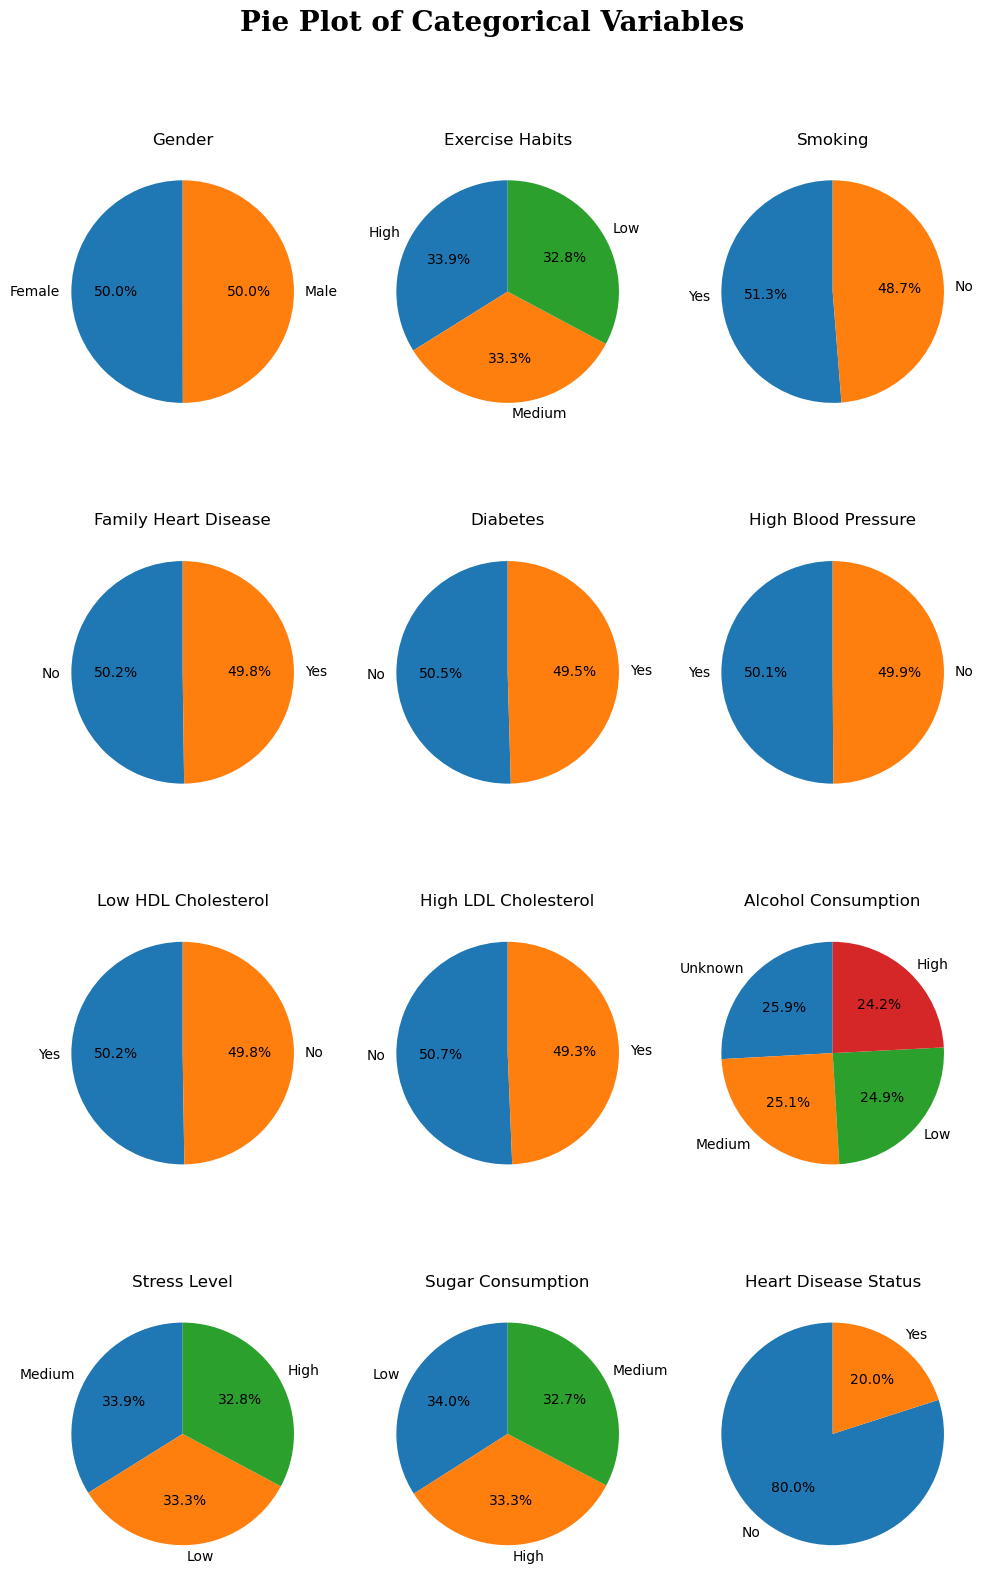

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Determine number of rows and columns for subplots
n_cols = 3  # you can adjust
n_rows = (len(categorical) + n_cols - 1) // n_cols  # ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows*4))
axes = axes.flatten()  # flatten in case of multiple rows

for i, col in enumerate(categorical):
    df1[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)
    axes[i].set_ylabel('')
    fig.suptitle("Pie Plot of Categorical Variables", fontsize=20, fontweight='bold', 
    fontfamily='serif', y=1.02)
    
# If there are unused subplots, remove them
# for j in range(i+1, len(axes)):
#     fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

6.2 Count PLot of categorical variables

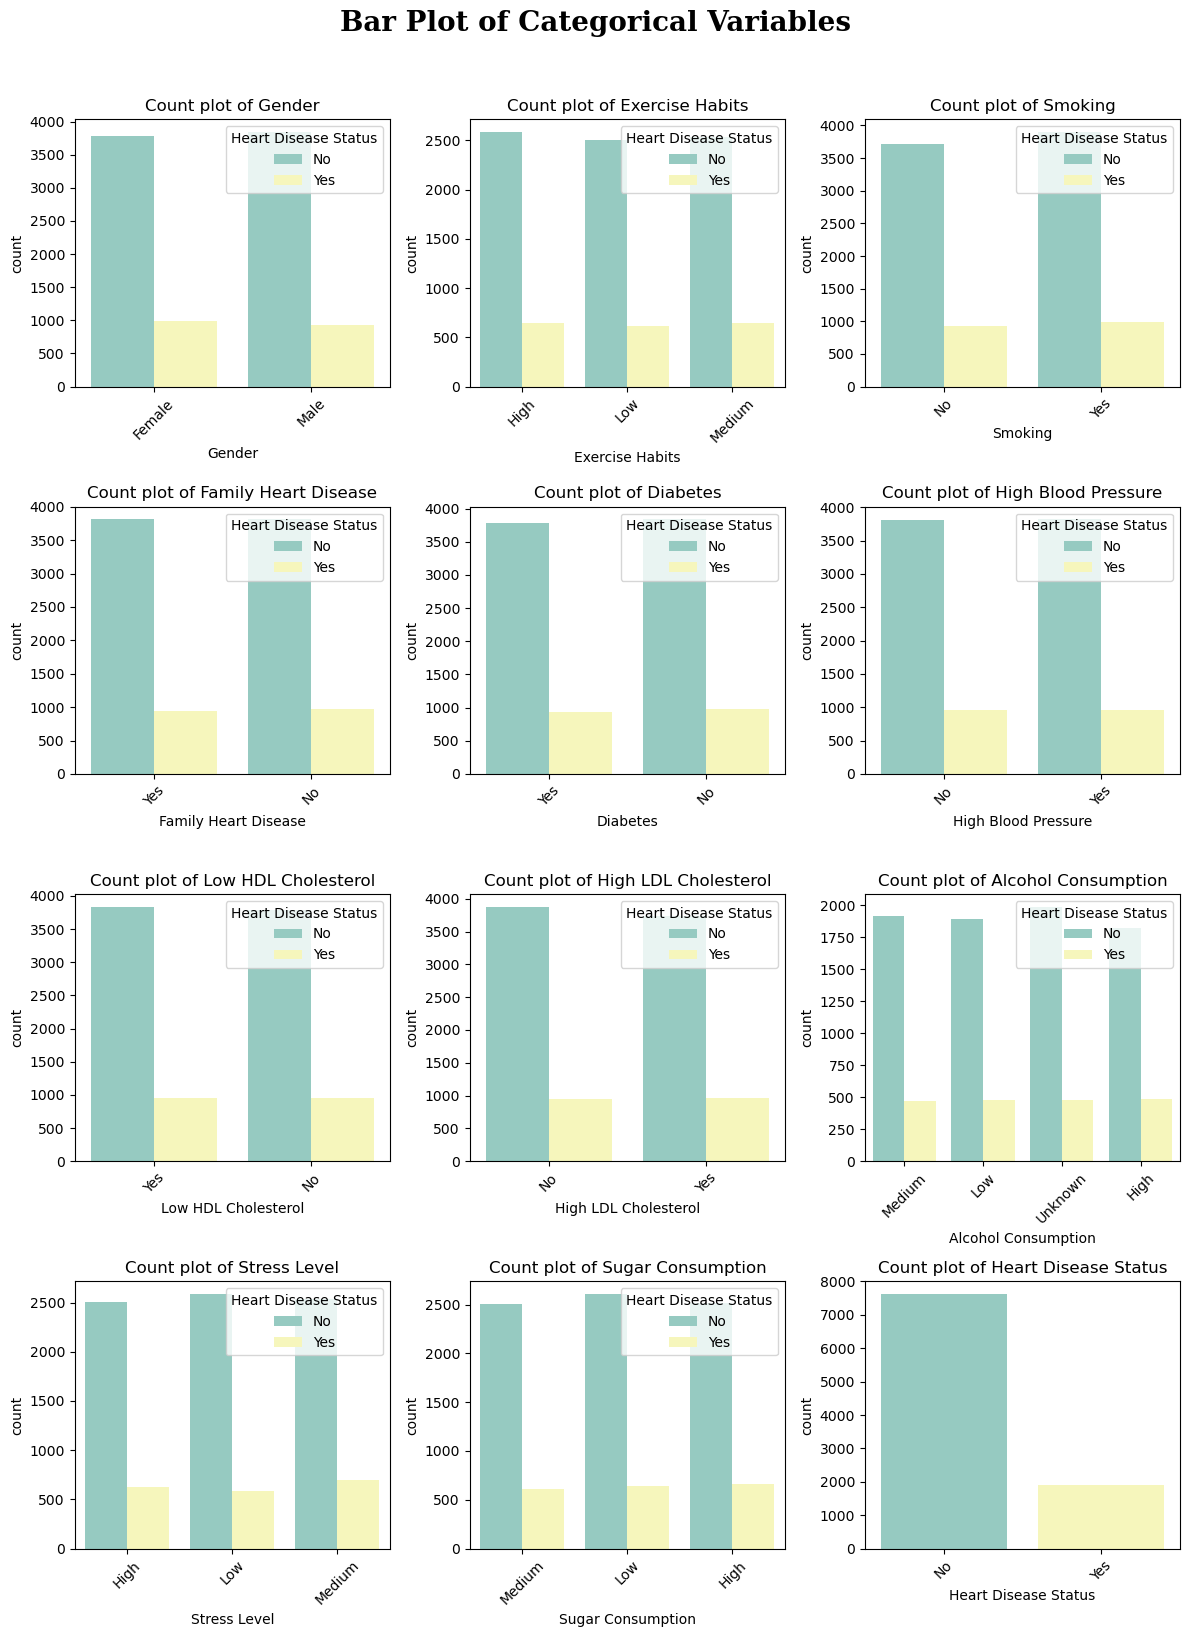

In [26]:
n_cols = 3
n_rows = (len(categorical) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical):
    sns.countplot(data=df1, x=col, ax=axes[i], palette='Set3', hue='Heart Disease Status')
    axes[i].set_title(f'Count plot of {col}')
    axes[i].tick_params(axis='x', rotation=45)
    fig.suptitle("Bar Plot of Categorical Variables", 
    fontsize=20,
    fontweight='bold',
    fontfamily='serif',
    y=1.02)

# Remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

6.3 Histogram of numerical variables

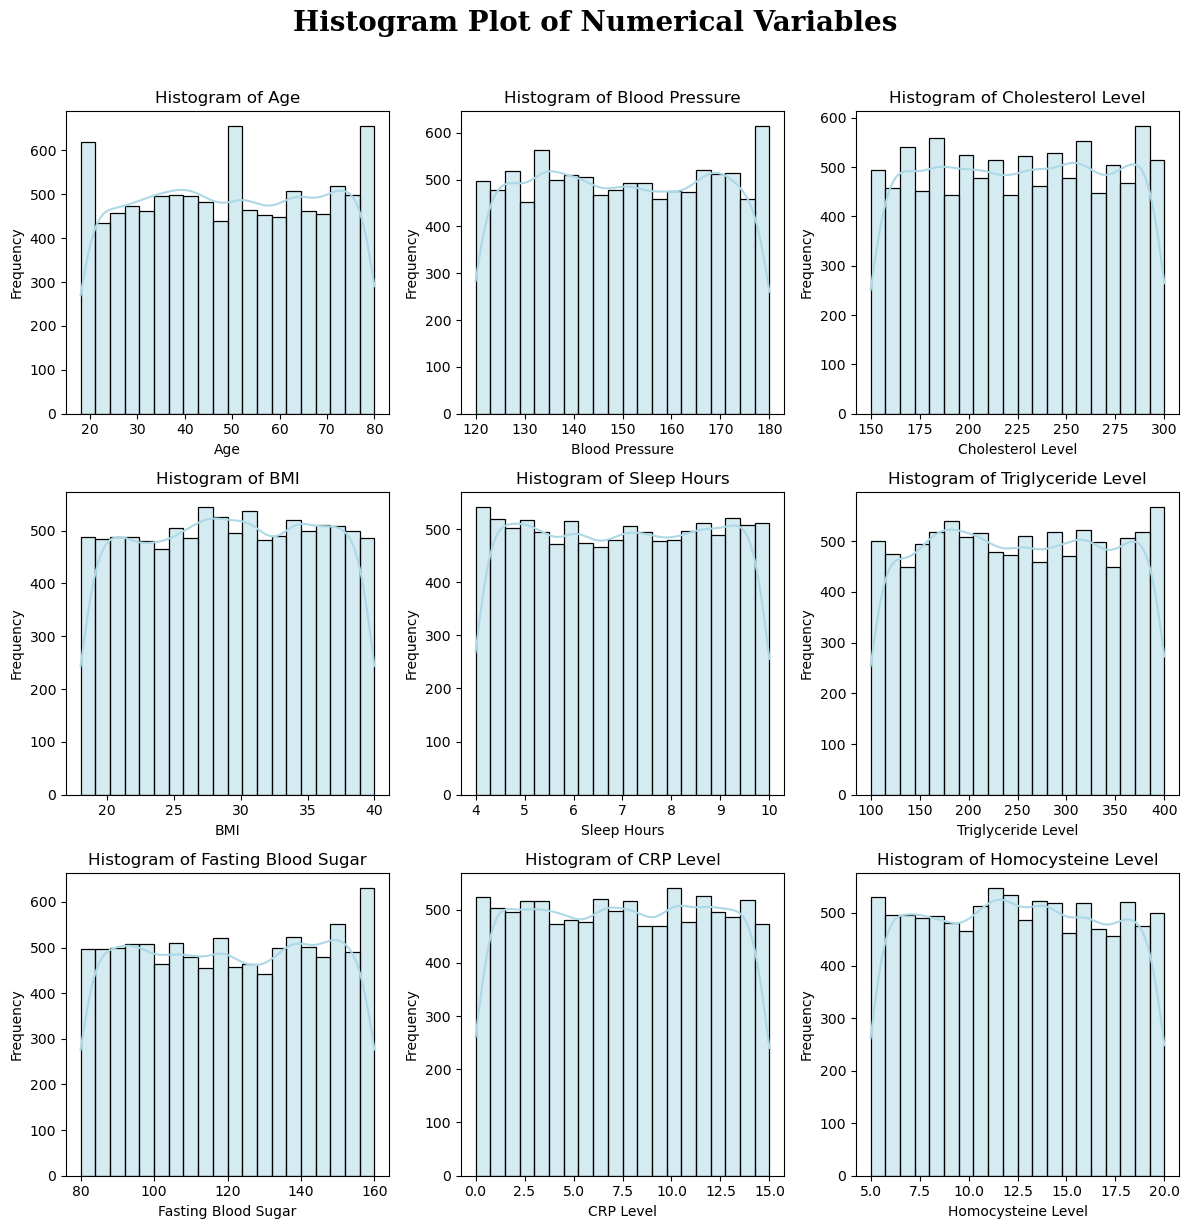

In [27]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i], color='lightblue')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    fig.suptitle(
    "Histogram Plot of Numerical Variables", 
    fontsize=20,
    fontweight='bold',
    fontfamily='serif',
    y=1.02)

# Remove any extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

6.4 Numerical column vs Target

C:\Users\User\AppData\Local\Temp\ipykernel_26432\3877736488.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Heart Disease Status', data=df1, ax=axes[i], palette='GnBu', orient='h')
C:\Users\User\AppData\Local\Temp\ipykernel_26432\3877736488.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Heart Disease Status', data=df1, ax=axes[i], palette='GnBu', orient='h')
C:\Users\User\AppData\Local\Temp\ipykernel_26432\3877736488.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, y='Heart Disease Status', data=df1, ax

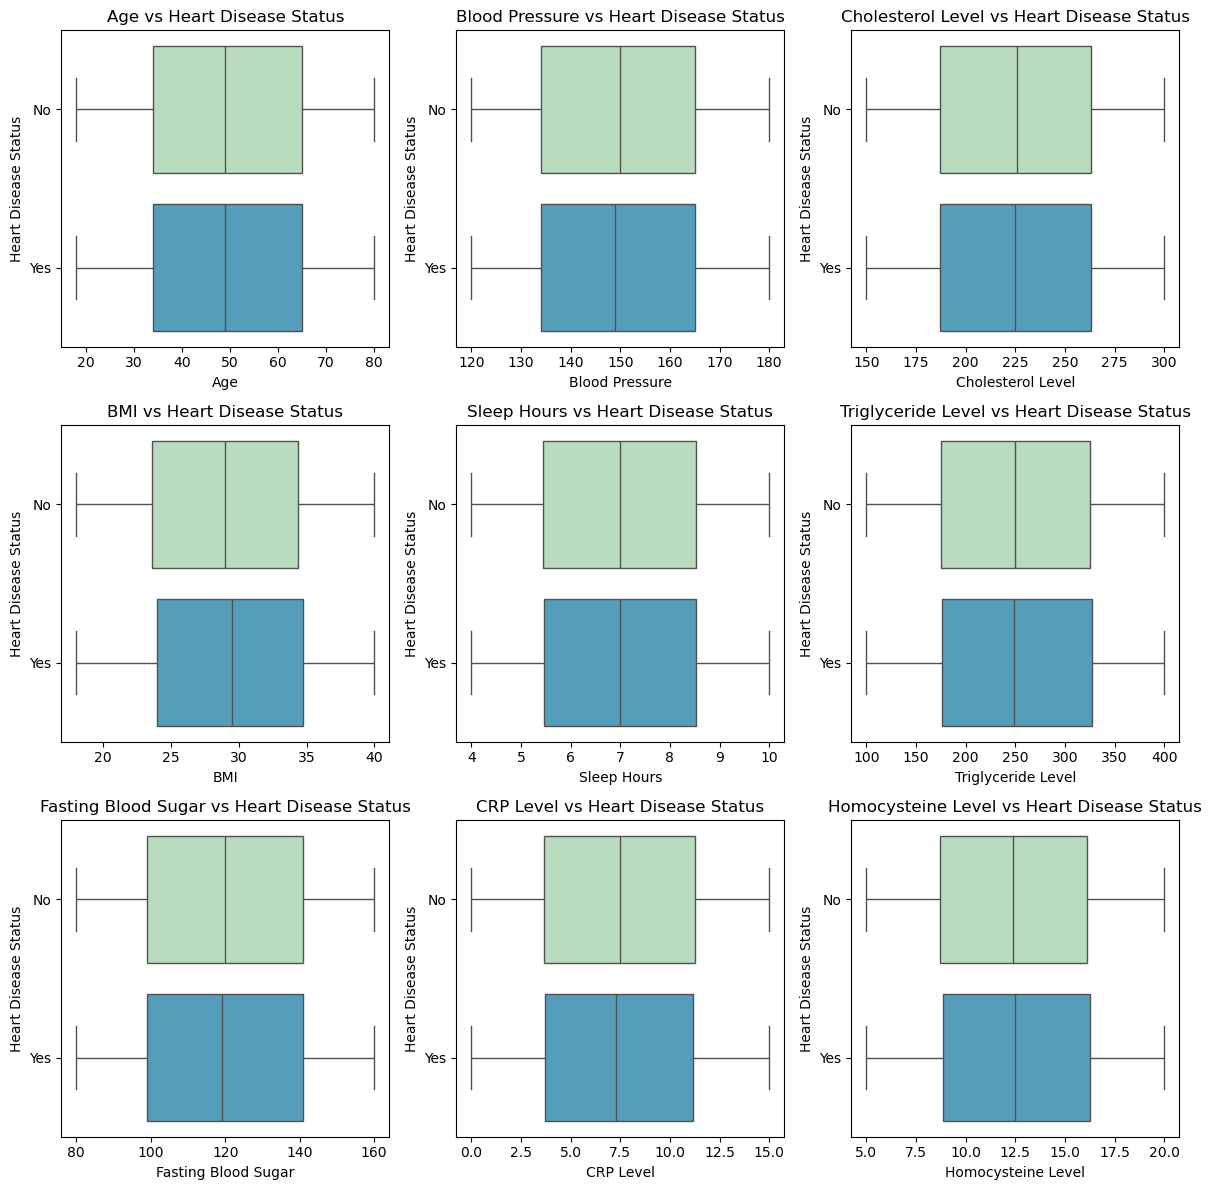

In [28]:
n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, y='Heart Disease Status', data=df1, ax=axes[i], palette='GnBu', orient='h')
    axes[i].set_title(f'{col} vs Heart Disease Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Heart Disease Status')

# Remove any extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

6.5 Categorical column vs Target

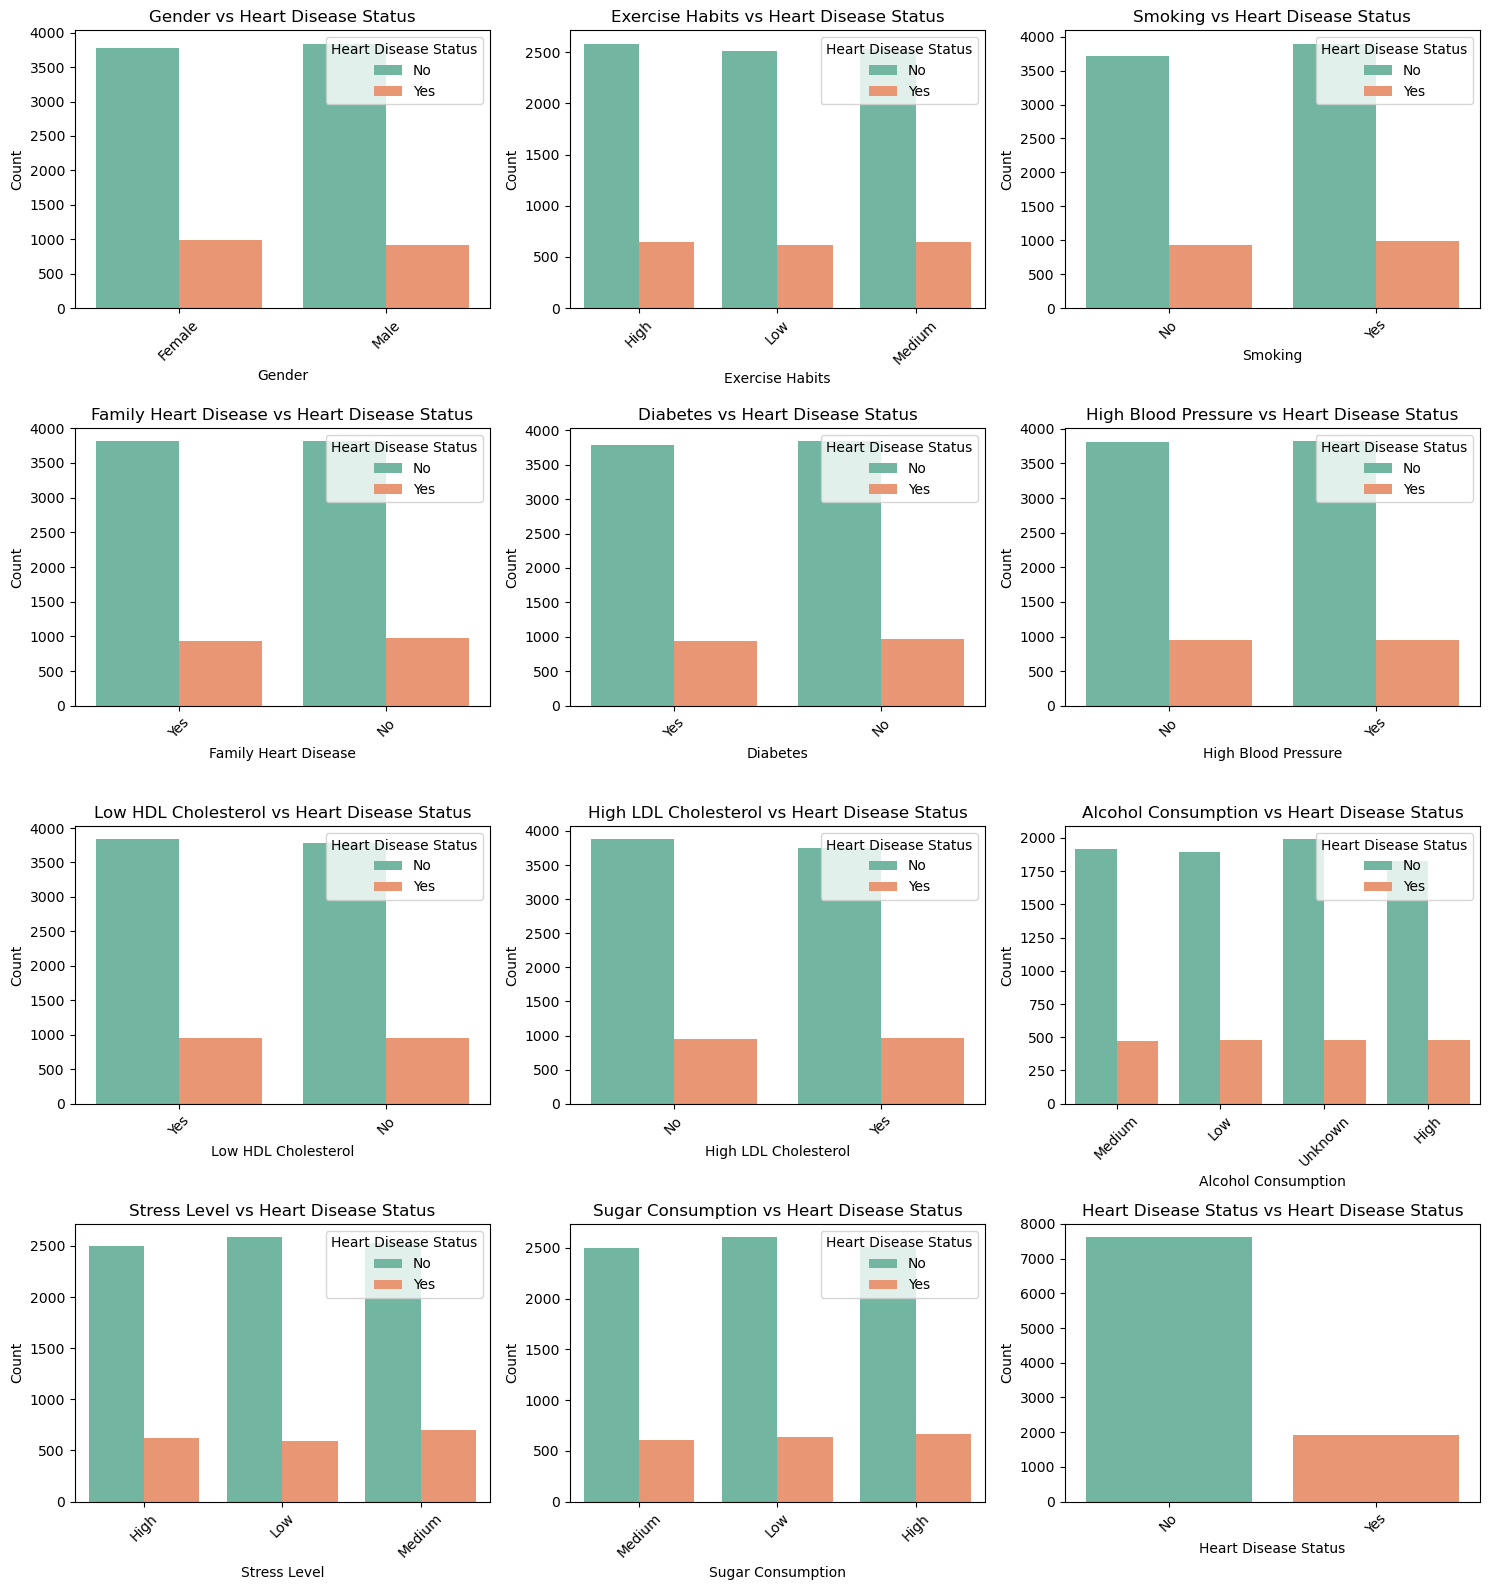

In [29]:
n_cols = 3
n_rows = (len(categorical) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(categorical):
    sns.countplot(x=col, hue='Heart Disease Status', data=df1, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} vs Heart Disease Status')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any extra axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Correlation analysis

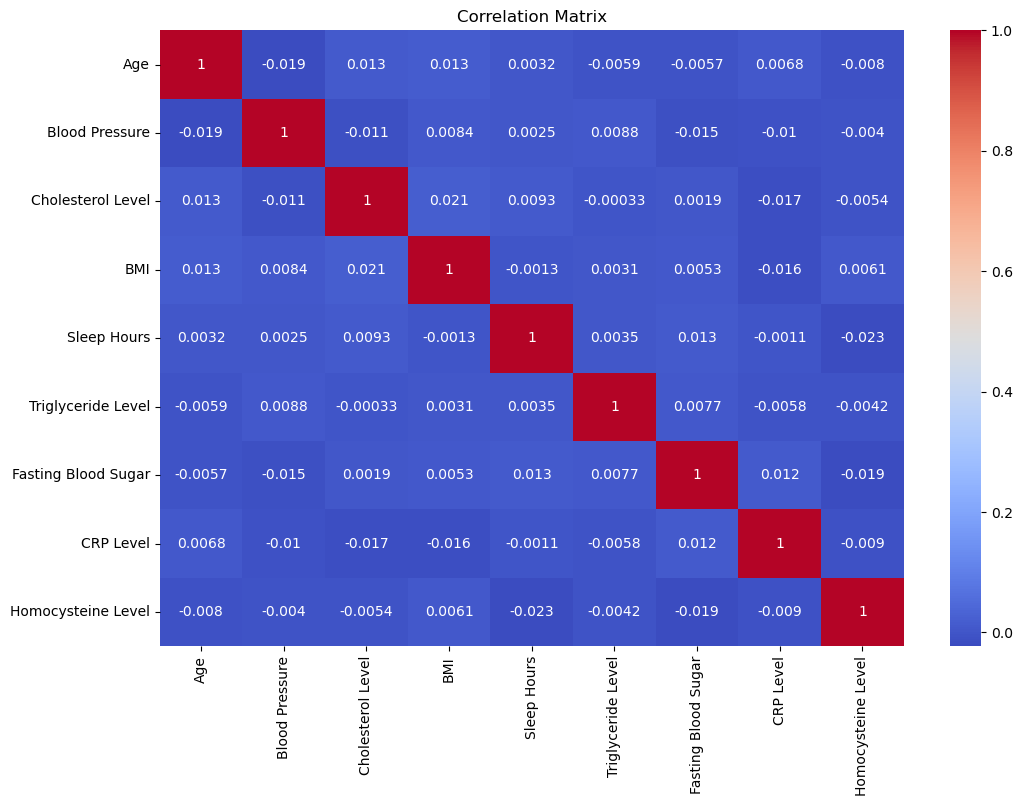

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(df1[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sns.pairplot(df1[num_cols + ['Heart Disease Status']], hue='Heart Disease Status')
plt.show()